In [4]:
import pandas as pd
from google.colab import drive
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import scipy

In [6]:
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Country-data.csv')

Mounted at /content/gdrive


In [7]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<ipython-input-10-d84da0327fc7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


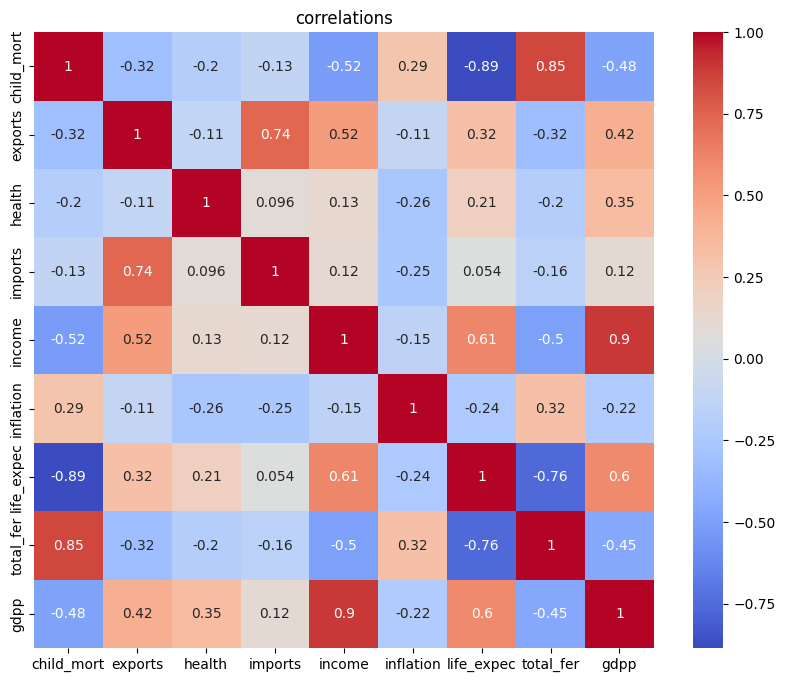

In [10]:
plt.figure(figsize=(10,8))
corrs = df.corr()
heatmap = sns.heatmap(corrs, annot=True, cmap="coolwarm")
plt.title("correlations")
plt.show()

In [11]:
comatrix = df.corr()
cogdpp = comatrix['gdpp']
print("Correlation Matrix:")
print(comatrix)
print("\nCorrelation with gdpp:")
print(cogdpp)

Correlation Matrix:
            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -

<ipython-input-11-286b4a659e88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comatrix = df.corr()


Text(0.5, 1.0, 'low health')

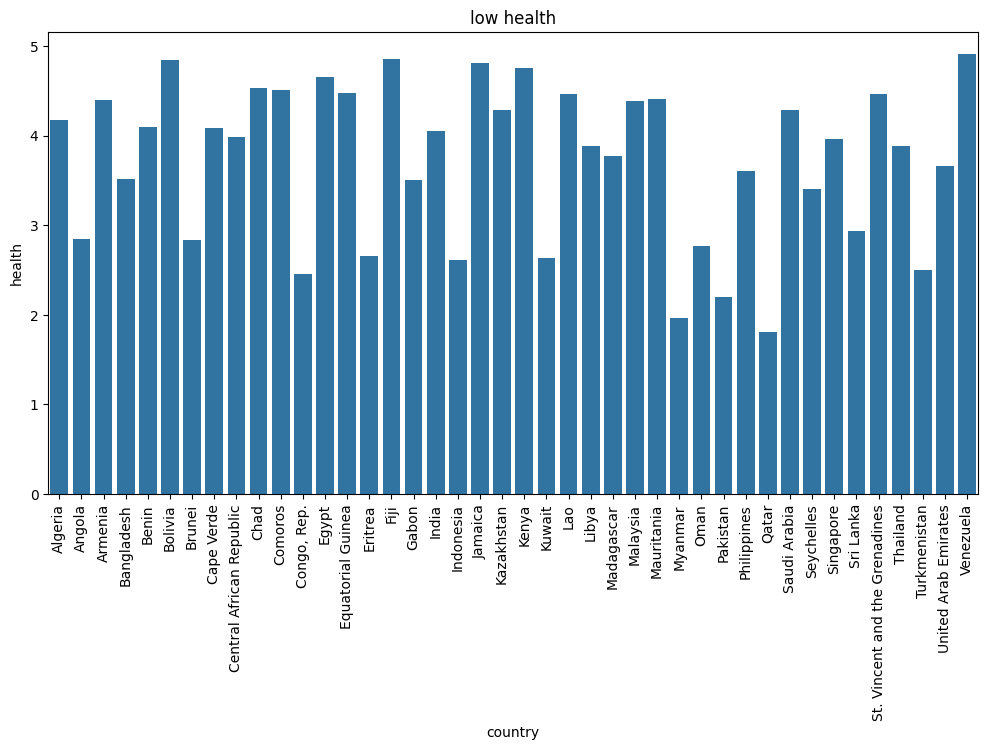

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="country",y="health",data=df[df["health"]<df.health.quantile(0.25)])
plt.xticks(rotation=90);
plt.title("low health")

Text(0.5, 1.0, 'countries with low income')

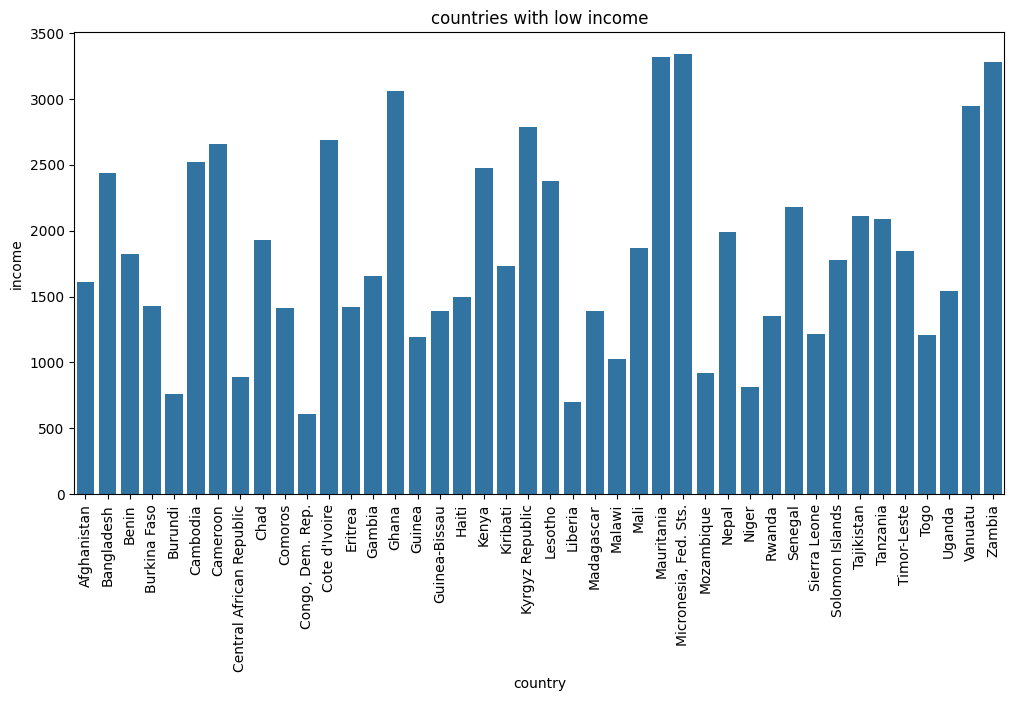

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x="country",y="income",data=df[df["income"]<df.income.quantile(0.25)])
plt.xticks(rotation=90);
plt.title("countries with low income")

In [14]:
df = df.drop(['imports', 'country'], axis=1)
from sklearn.preprocessing import MinMaxScaler
std_features = MinMaxScaler()
df_std = std_features.fit_transform(df.values)

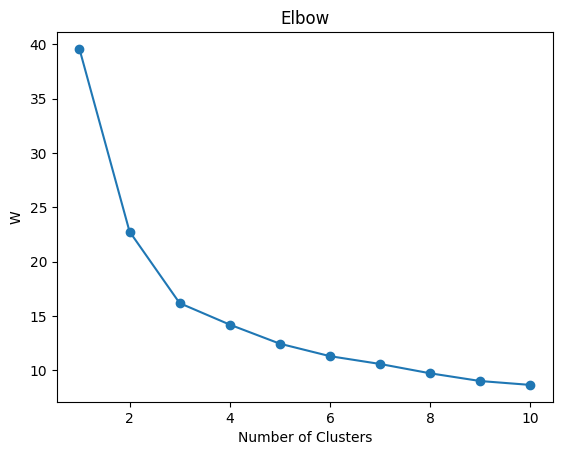

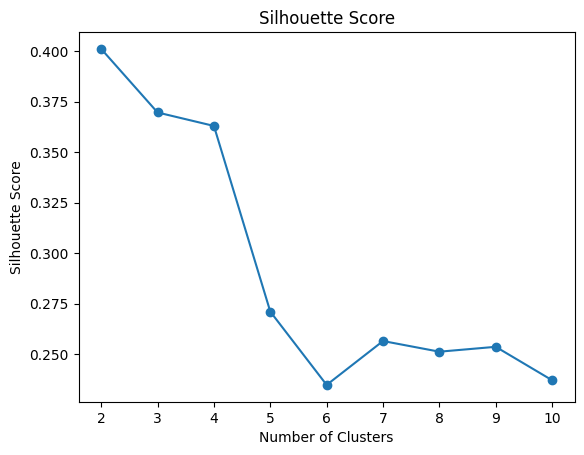

In [15]:
w = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(df_std)
    w.append(kmeans.inertia_)
plt.plot(range(1, 11), w, marker='o')
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('W')
plt.show()
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(df_std)
    silhouette_scores.append(silhouette_score(df_std, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

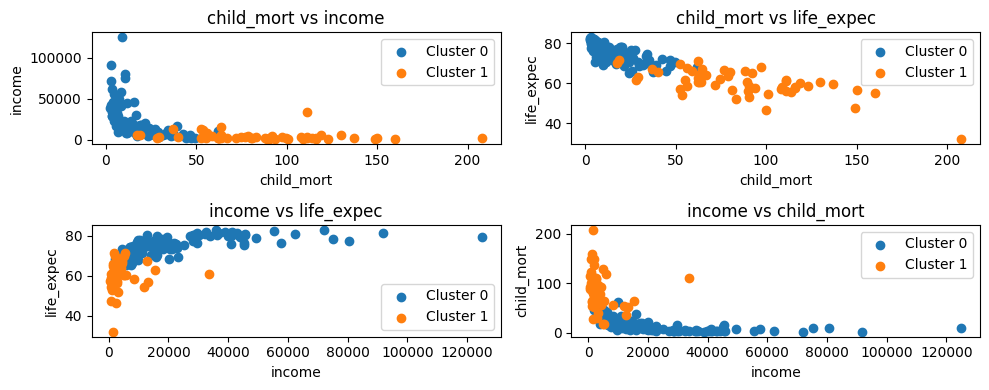

In [16]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=10, random_state=42)
kmeans.fit(df_std)
df['Cluster'] = kmeans.labels_
feature1 = 'child_mort'
feature2 = 'income'
feature3 = 'life_expec'
plt.figure(figsize=(10, 4))
plt.subplot(2, 2, 1)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.subplot(2, 2, 2)
for cluster in range(optimal_clusters):
    cluster_data =df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature3}')
plt.xlabel(feature1)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 3)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature3}')
plt.xlabel(feature2)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 4)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature1], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature1}')
plt.xlabel(feature2)
plt.ylabel(feature1)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
df['Cluster_kmeans'] = kmeans.predict(df_std)
print(df[['Cluster_kmeans']])

     Cluster_kmeans
0                 1
1                 0
2                 0
3                 1
4                 0
..              ...
162               1
163               0
164               0
165               1
166               1

[167 rows x 1 columns]


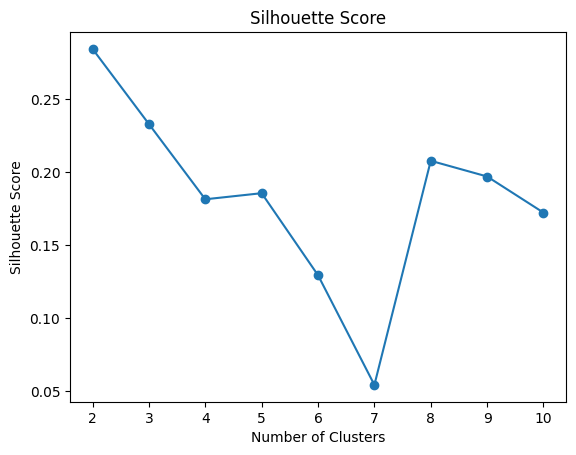

optimal_clusters =  2


In [18]:
silhouette_scores = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(df_std)
    labels = gmm.predict(df_std)
    silhouette_scores.append(silhouette_score(df_std, labels))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("optimal_clusters = ", optimal_clusters)

     Cluster_GMM
0              1
1              1
2              1
3              1
4              0
..           ...
162            1
163            0
164            1
165            1
166            1

[167 rows x 1 columns]


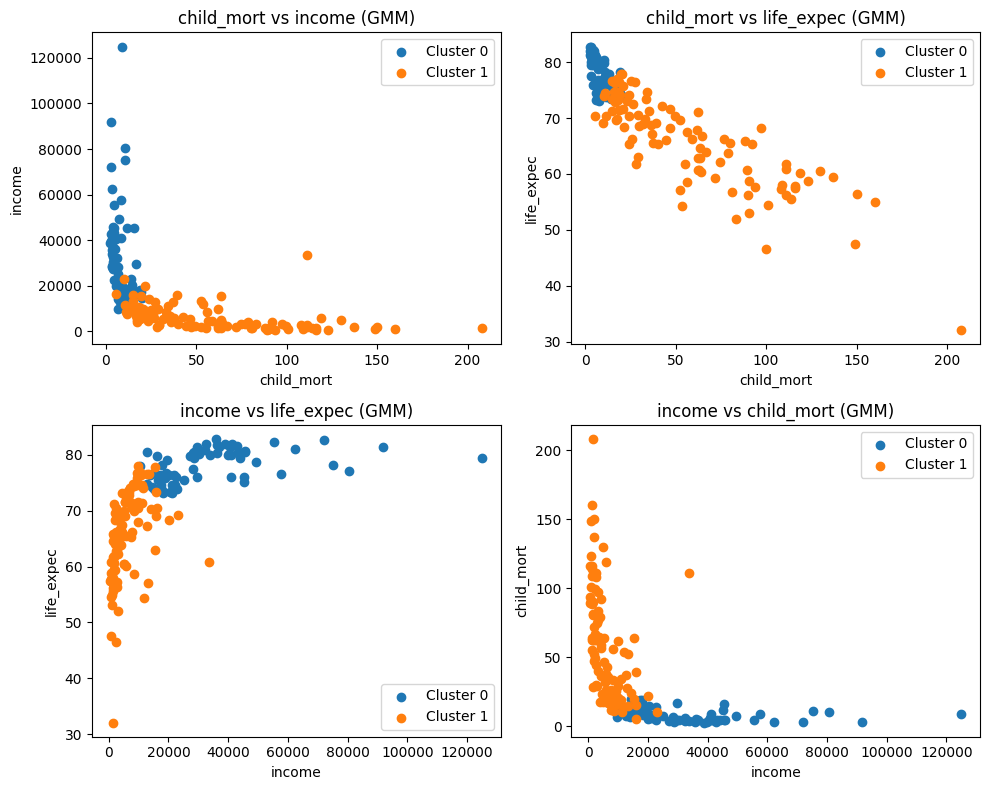

In [19]:
optimal_clusters = 2
gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_optimal.fit(df_std)
df['Cluster_GMM'] = gmm_optimal.predict(df_std)
print(df[['Cluster_GMM']])
feature1 = 'child_mort'
feature2 = 'income'
feature3 = 'life_expec'
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster_GMM'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature2} (GMM)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.subplot(2, 2, 2)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster_GMM'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature3} (GMM)')
plt.xlabel(feature1)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 3)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster_GMM'] == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature3} (GMM)')
plt.xlabel(feature2)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 4)
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster_GMM'] == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature1], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature1} (GMM)')
plt.xlabel(feature2)
plt.ylabel(feature1)
plt.legend()
plt.tight_layout()
plt.show()

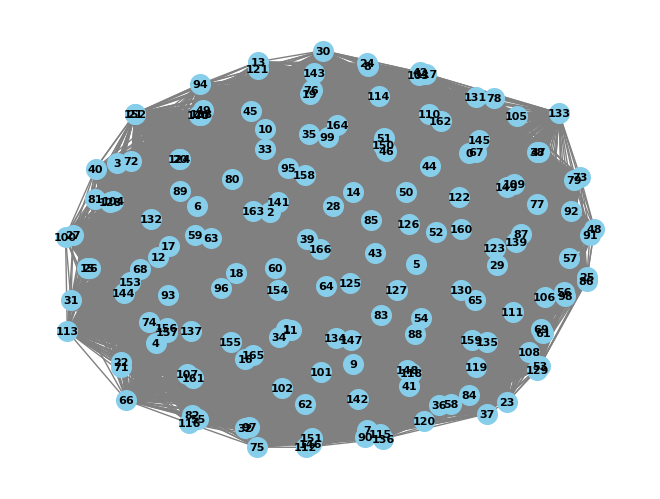

<ipython-input-20-d82a6e3bdd3e>:13: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(laplacian_matrix, eigvals=(0, n_clusters - 1))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-d82a6e3bdd3e>:13: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(laplacian_matrix, eigvals=(0, n_clusters - 1))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython

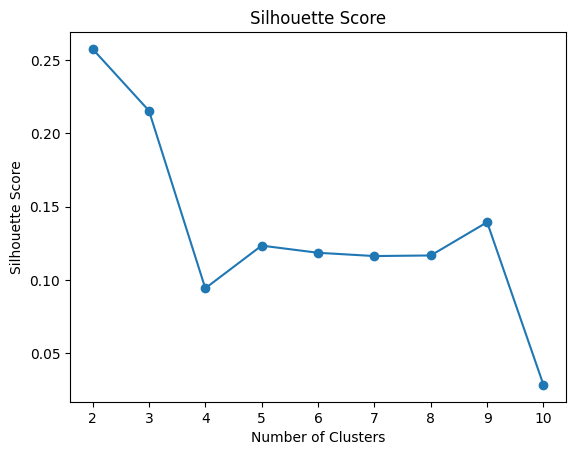

Cluster Assignments:
[0 2 2 2 2 2 2 1 1 2 1 1 0 2 2 1 2 0 2 2 2 2 2 1 2 0 0 0 0 1 2 0 0 2 2 2 0
 0 2 2 0 2 1 1 1 2 2 2 2 1 0 1 2 1 1 2 0 2 1 0 1 2 2 0 0 2 0 2 1 0 2 2 2 1
 1 1 2 1 2 2 0 0 1 0 0 2 2 0 0 1 2 1 2 0 0 2 2 0 1 0 2 0 0 2 2 2 0 0 2 0 1
 1 0 2 1 1 0 2 2 2 2 2 1 1 2 2 0 2 1 0 2 2 0 1 1 1 0 2 1 1 2 2 0 2 1 1 0 0
 2 0 0 2 2 2 2 0 2 1 1 1 2 0 0 2 0 0 0]


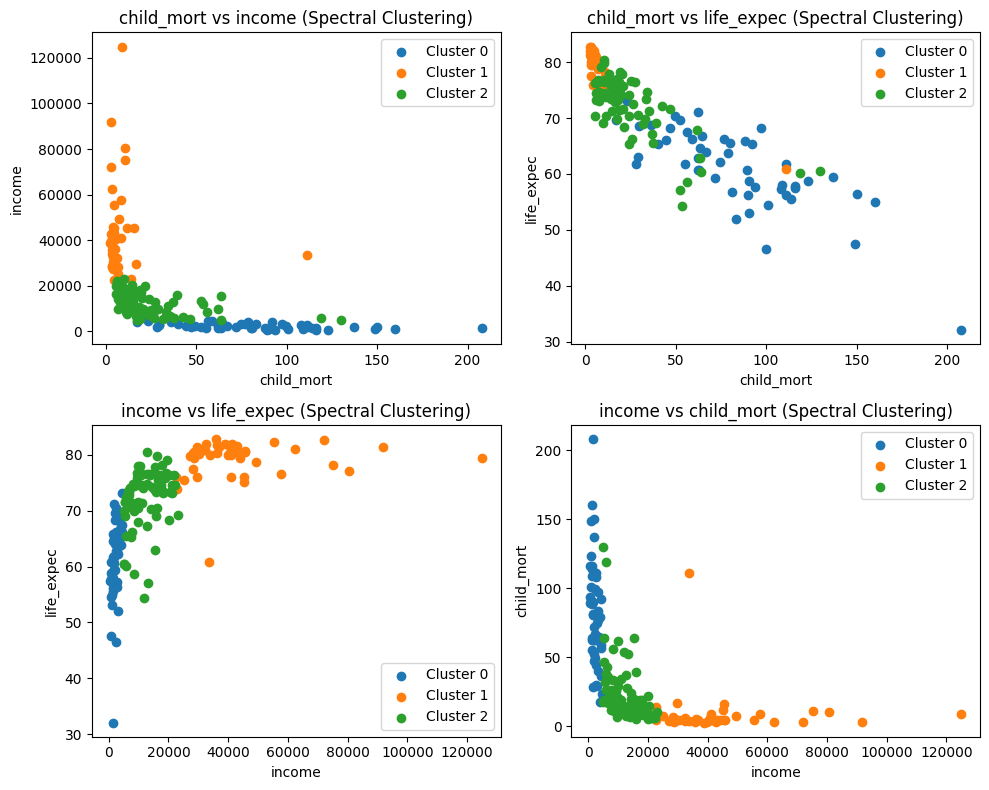

In [20]:
from scipy.linalg import eigh

def spectral_clustering(X, n_clusters, n_neighbors):
    # Step 1: Construct the Affinity Matrix using kneighbors_graph
    affinity_matrix = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity', include_self=True)
    affinity_matrix = 0.5 * (affinity_matrix + affinity_matrix.T)  # Make it symmetric

    # Step 2: Compute the Laplacian Matrix
    degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))
    laplacian_matrix = degree_matrix - affinity_matrix

    # Step 3: Compute the first k eigenvectors (smallest eigenvalues) of the Laplacian matrix
    eigenvalues, eigenvectors = eigh(laplacian_matrix, eigvals=(0, n_clusters - 1))

    # Step 4: Form clusters using k-means on the obtained eigenvectors
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(eigenvectors)

    return cluster_labels

import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(df_std, df_std)

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(df)):
    G.add_node(i, data=df.iloc[i])

# Add edges based on a distance threshold
distance_threshold = 1.5  # Adjust this threshold based on your data
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if distances[i, j] < distance_threshold:
            G.add_edge(i, j)

# Visualize the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray')
adjacency_matrix = nx.to_numpy_array(G)
plt.show()

silhouette_scores = []
for n_clusters in range(2, 11):
    cluster_labels = spectral_clustering(adjacency_matrix, n_clusters=n_clusters, n_neighbors=5)  # Adjust n_neighbors as needed
    silhouette_avg = silhouette_score(adjacency_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 3
spectral_model_optimal = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels_optimal = spectral_model_optimal.fit_predict(df)
print("Cluster Assignments:")
print(cluster_labels_optimal)
feature1 = 'child_mort'
feature2 = 'income'
feature3 = 'life_expec'
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels_optimal == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature2} (Spectral Clustering)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.subplot(2, 2, 2)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels_optimal == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature3} (Spectral Clustering)')
plt.xlabel(feature1)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 3)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels_optimal == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature3} (Spectral Clustering)')
plt.xlabel(feature2)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 4)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels_optimal == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature1], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature1} (Spectral Clustering)')
plt.xlabel(feature2)
plt.ylabel(feature1)
plt.legend()
plt.tight_layout()
plt.show()

Cluster Assignments:
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


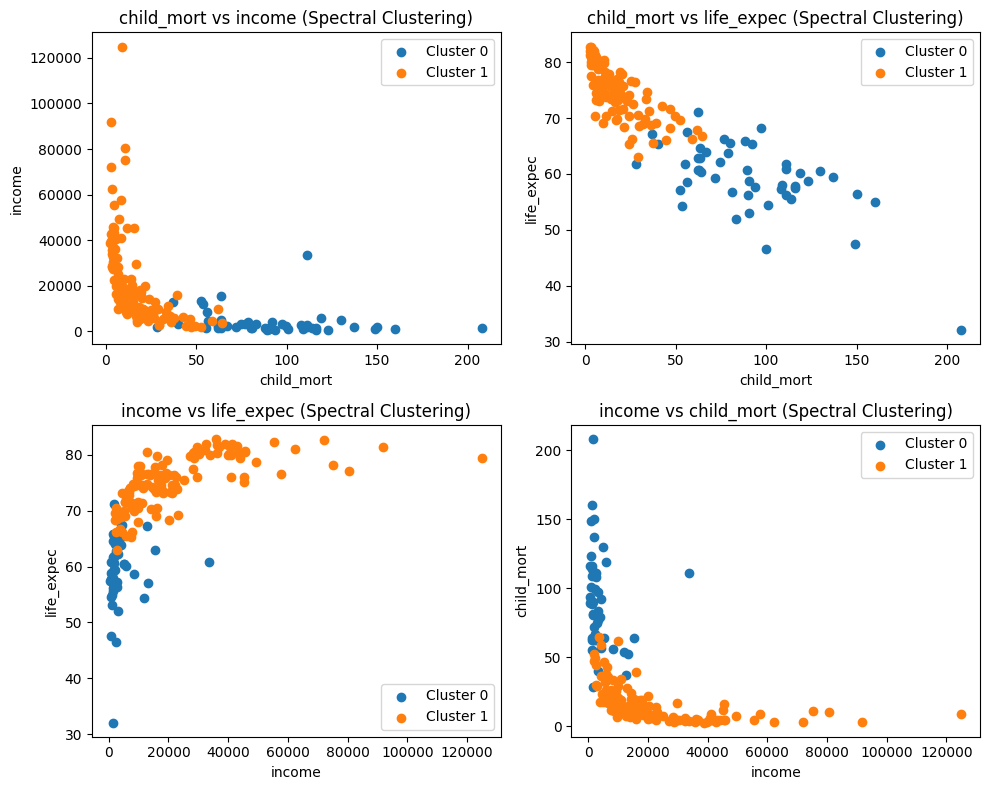

In [21]:
optimal_clusters = 2
spectral_model = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral_model.fit_predict(df_std)
print("Cluster Assignments:")
print(cluster_labels)
feature1 = 'child_mort'
feature2 = 'income'
feature3 = 'life_expec'
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature2} (Spectral Clustering)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.subplot(2, 2, 2)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature3], label=f'Cluster {cluster}')
plt.title(f'{feature1} vs {feature3} (Spectral Clustering)')
plt.xlabel(feature1)
plt.ylabel(feature3)
plt.legend()

# Plot Feature 2 vs Feature 3
plt.subplot(2, 2, 3)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}')

plt.title(f'{feature2} vs {feature3} (Spectral Clustering)')
plt.xlabel(feature2)
plt.ylabel(feature3)
plt.legend()
plt.subplot(2, 2, 4)
for cluster in range(optimal_clusters):
    cluster_data = df[cluster_labels == cluster]
    plt.scatter(cluster_data[feature2], cluster_data[feature1], label=f'Cluster {cluster}')
plt.title(f'{feature2} vs {feature1} (Spectral Clustering)')
plt.xlabel(feature2)
plt.ylabel(feature1)
plt.legend()
plt.tight_layout()
plt.show()